<a href="https://colab.research.google.com/github/maneakansha36/my_first_repository/blob/main/Supervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Tasks:
 1. Exploratory Data Analysis (EDA):

 ● Perform a detailed exploratory data analysis to understand the distribution of each
 feature and its relationship with the target variable, Churn.

 ● Identify missing values, outliers, and other data quality issues.

● Visualize correlations, distributions, and any interesting patterns

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [146]:
train_df = pd.read_csv('/content/Training_data.csv')
test_df = pd.read_csv('/content/Testing_data.csv')

# Quick overview
train_df.info()
train_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5465 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5465 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,9509-MPYOD,Female,0,No,No,35,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.75,700.45,No
1,7746-AWNQW,Female,0,No,No,28,No,No phone service,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,35.75,961.4,No
2,2208-UGTGR,Male,0,No,No,56,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,98.60,5581.05,No
3,4884-LEVMQ,Male,0,Yes,No,39,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.45,790,No
4,6682-VCIXC,Female,0,Yes,Yes,43,No,No phone service,DSL,NaN,...,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),51.25,2151.6,No


In [147]:
# Check missing values
print(train_df.isnull().sum())



customerID            0
gender              169
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity      169
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges      394
TotalCharges        281
Churn                 0
dtype: int64


In [148]:
# Convert TotalCharges to numeric if it's object type
train_df['TotalCharges'] = pd.to_numeric(train_df['TotalCharges'], errors='coerce')
train_df['TotalCharges'].fillna(train_df['TotalCharges'].median(), inplace=True)

/tmp/ipython-input-910126678.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['TotalCharges'].fillna(train_df['TotalCharges'].median(), inplace=True)


In [149]:
#Numerical features:
print(train_df.describe())


       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    5634.000000  5634.000000     5240.000000   5634.000000
mean        0.159744    32.606851       65.102052   2238.250728
std         0.366401    24.614976       30.056443   2216.294428
min         0.000000     0.000000       18.250000     18.850000
25%         0.000000     9.000000       36.800000    446.062500
50%         0.000000    29.000000       70.650000   1396.450000
75%         0.000000    56.000000       90.050000   3590.537500
max         1.000000    72.000000      118.750000   8684.800000


In [150]:
#Categorical features:
print(train_df.describe(include='object'))


        customerID gender Partner Dependents PhoneService MultipleLines  \
count         5634   5465    5634       5634         5634          5634   
unique        5634      2       2          2            2             3   
top     3402-XRIUO   Male      No         No          Yes            No   
freq             1   2744    2890       3960         5081          2701   

       InternetService OnlineSecurity OnlineBackup DeviceProtection  \
count             5634           5465         5634             5634   
unique               3              3            3                3   
top        Fiber optic             No           No               No   
freq              2486           2720         2459             2485   

       TechSupport StreamingTV StreamingMovies        Contract  \
count         5634        5634            5634            5634   
unique           3           3               3               3   
top             No          No              No  Month-to-month   
freq

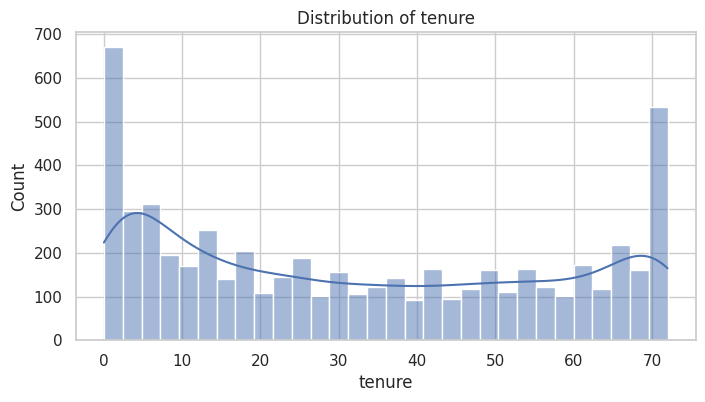

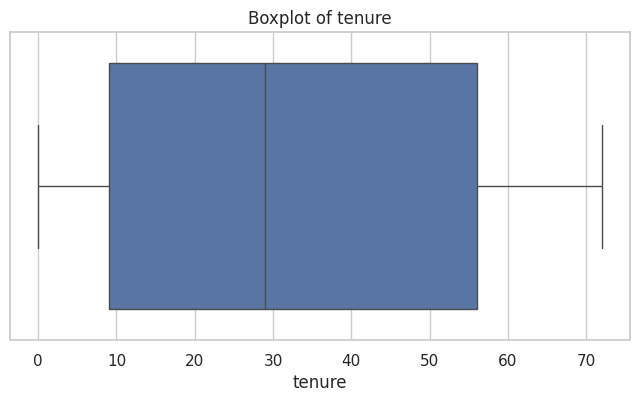

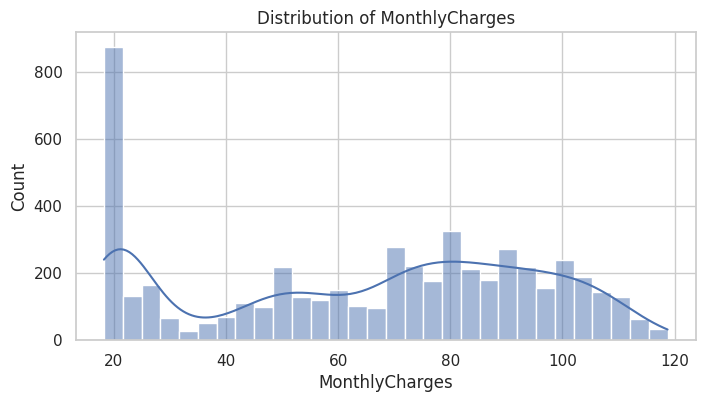

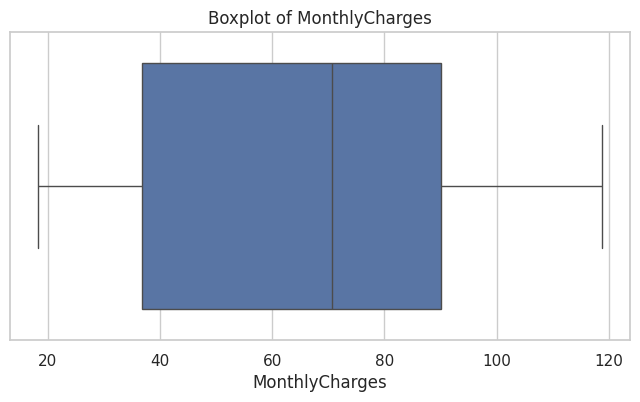

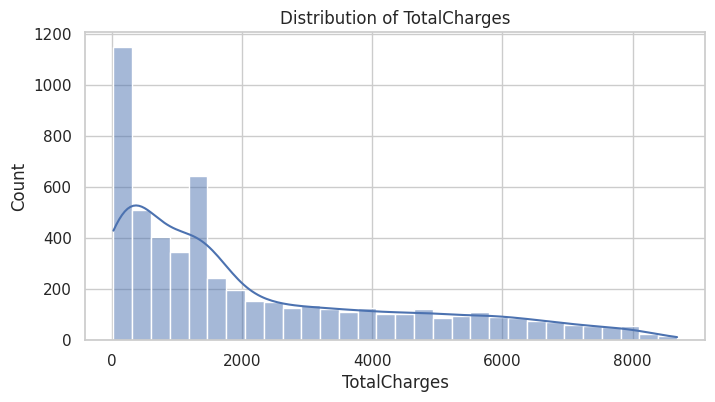

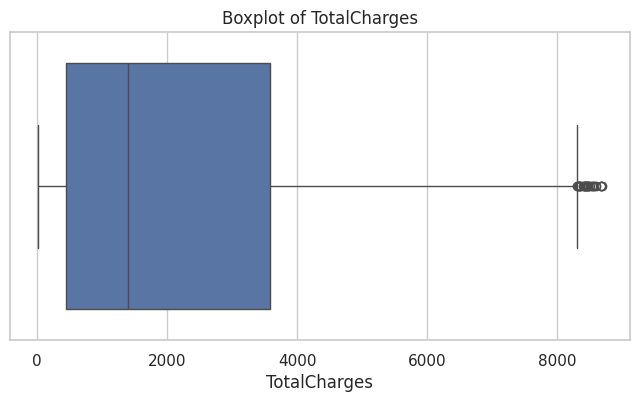

In [151]:
#Analyze Distribution of Numerical Features
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in num_features:
    plt.figure(figsize=(8,4))
    sns.histplot(train_df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show() # Explicitly show the histogram

    # Boxplot for outliers
    plt.figure(figsize=(8,4))
    sns.boxplot(x=train_df[col])
    plt.title(f'Boxplot of {col}')
    plt.show() # Explicitly show the boxplot

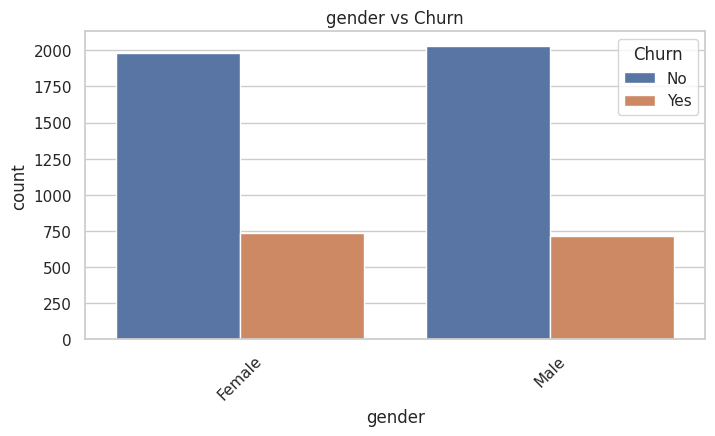

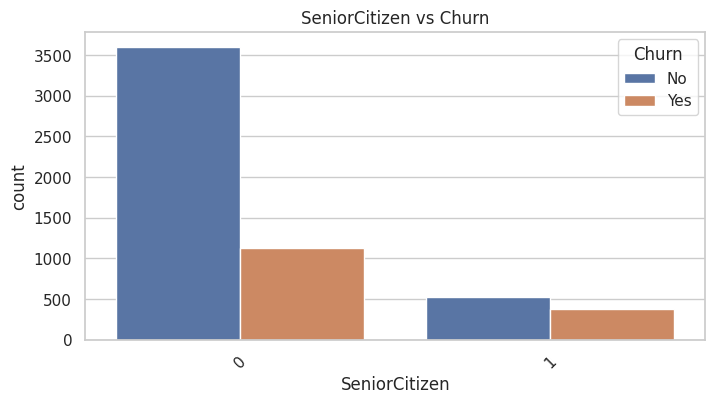

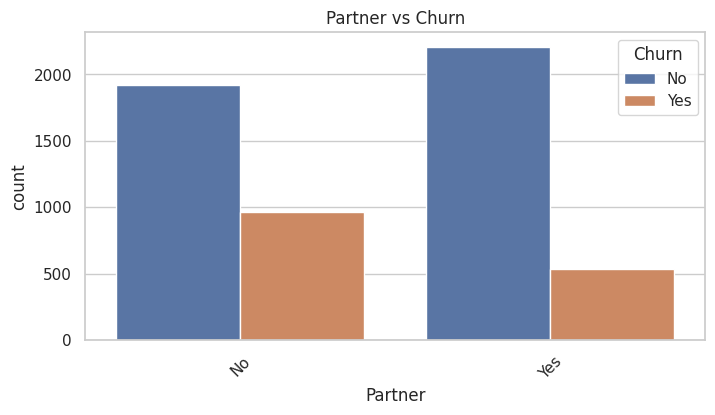

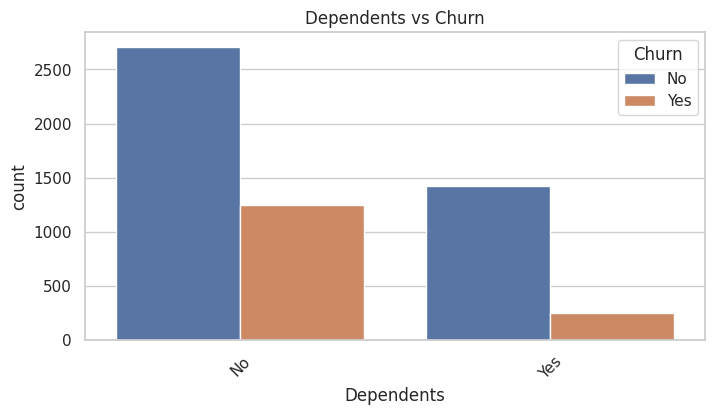

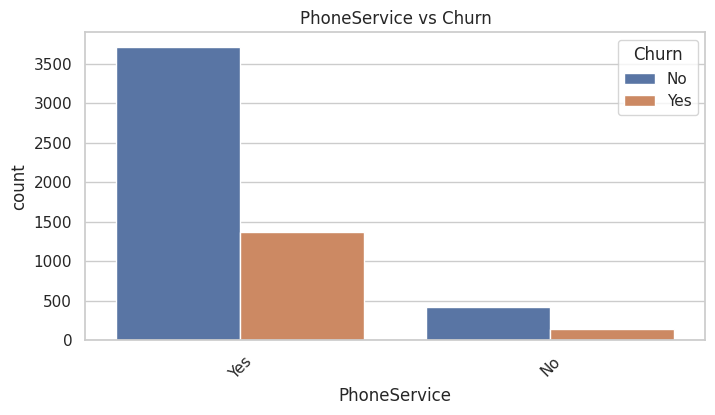

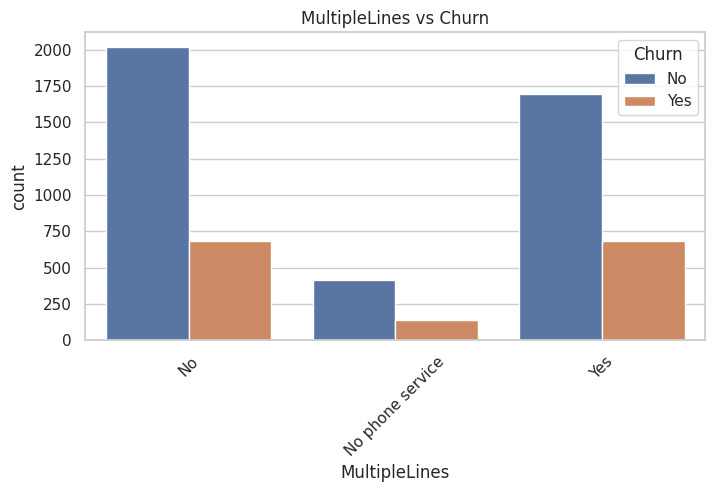

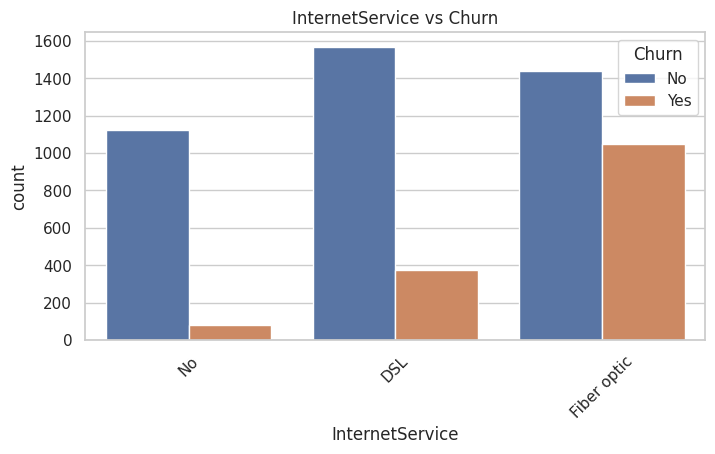

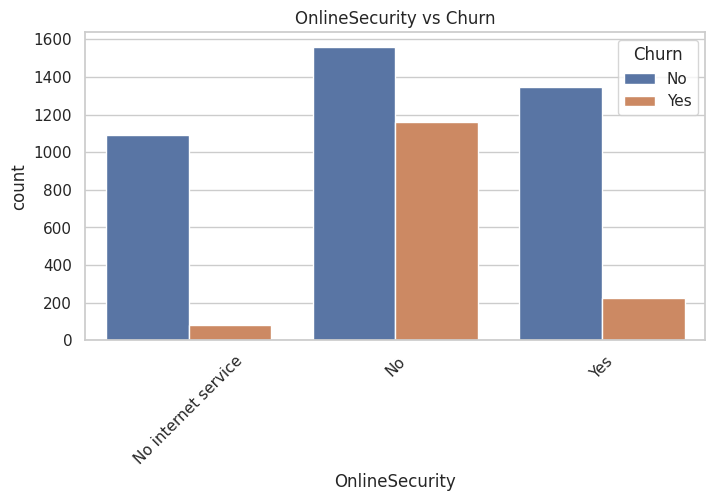

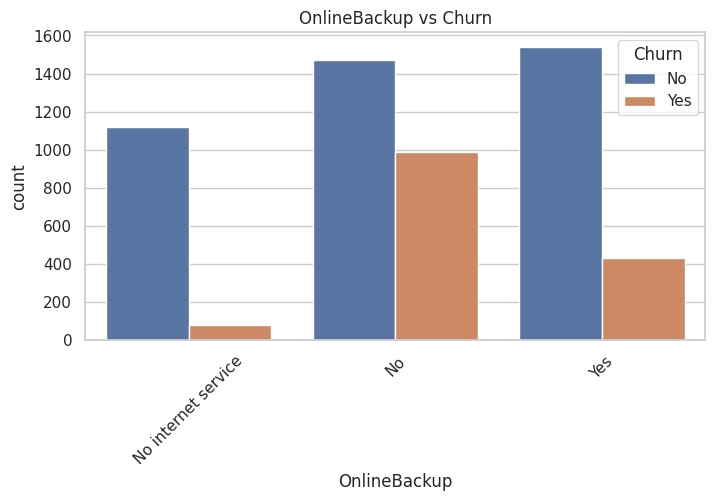

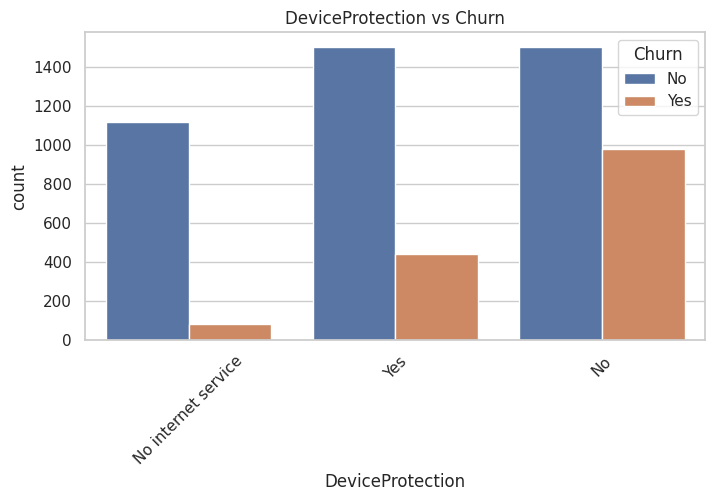

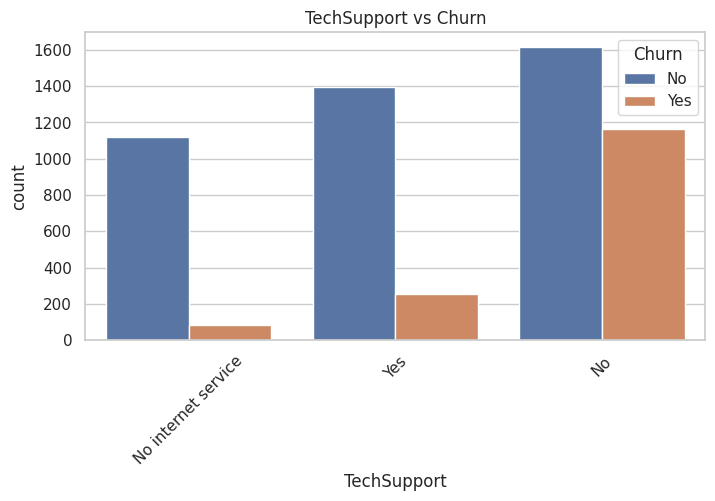

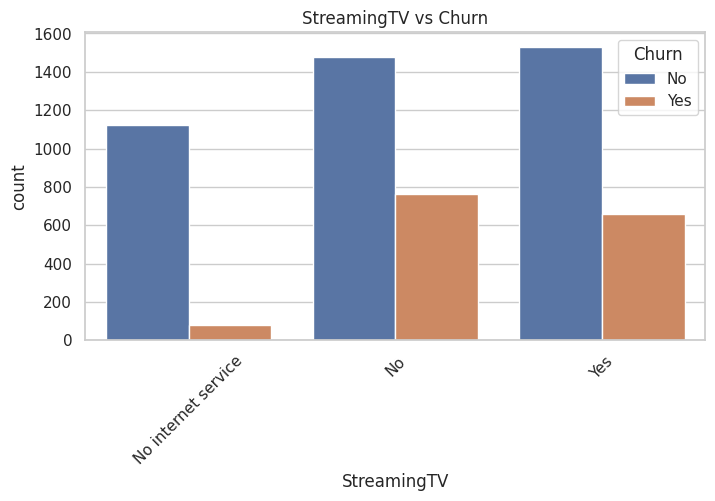

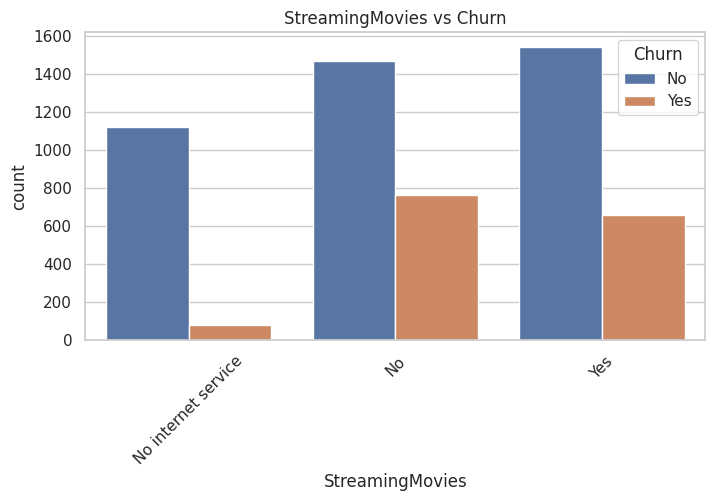

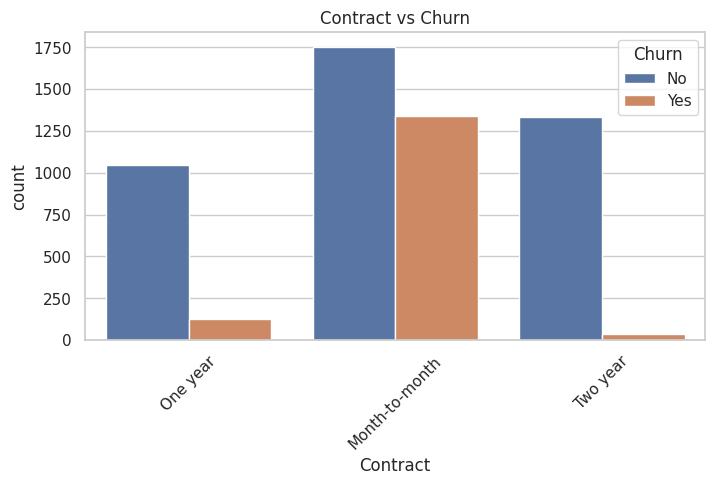

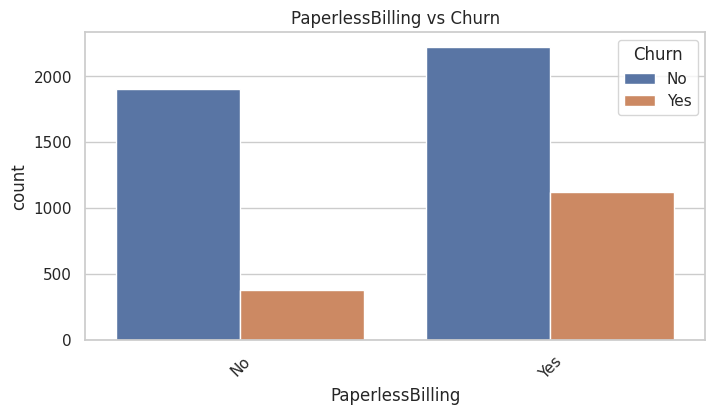

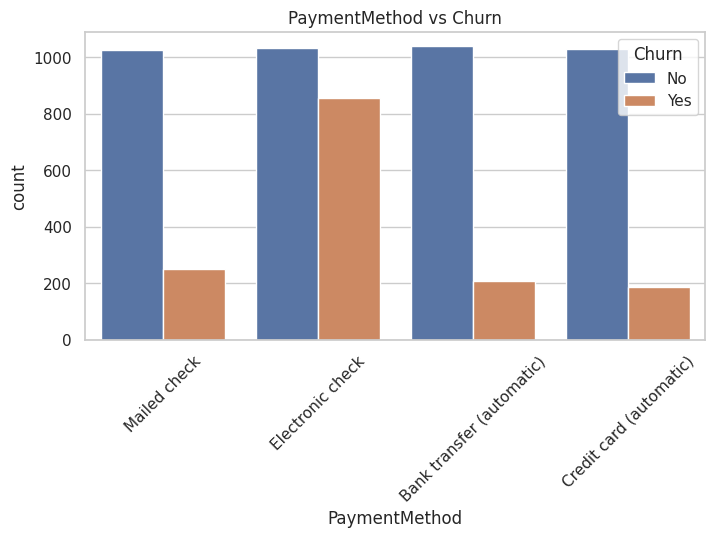

In [152]:
#Analyze Categorical Features
cat_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                'Contract', 'PaperlessBilling', 'PaymentMethod']

for col in cat_features:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, hue='Churn', data=train_df)
    plt.title(f'{col} vs Churn')
    plt.xticks(rotation=45)
    plt.show()

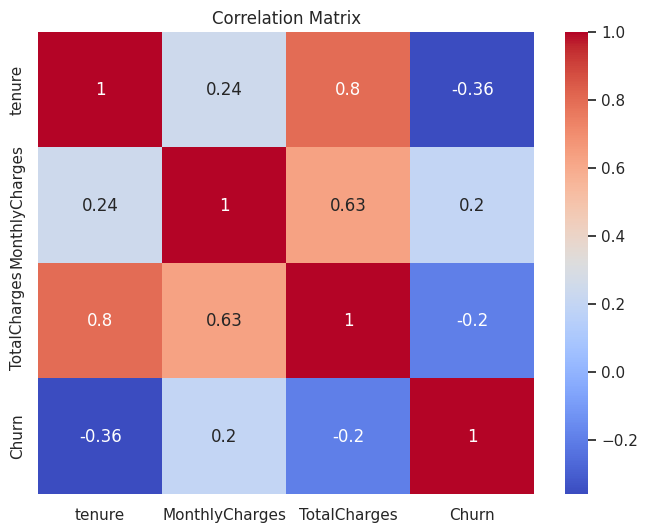

In [153]:
#Correlation Analysis

# Convert 'Churn' to numerical for correlation analysis
train_df['Churn'] = train_df['Churn'].map({'Yes': 1, 'No': 0})

#Numerical correlations with Churn
plt.figure(figsize=(8,6))
sns.heatmap(train_df[num_features + ['Churn']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [154]:
#Churn Rate by Category
for col in cat_features:
    churn_rate = train_df.groupby(col)['Churn'].mean().sort_values(ascending=False)
    print(f"\nChurn rate by {col}:\n{churn_rate}")



Churn rate by gender:
gender
Female    0.271959
Male      0.260569
Name: Churn, dtype: float64

Churn rate by SeniorCitizen:
SeniorCitizen
1    0.416667
0    0.238488
Name: Churn, dtype: float64

Churn rate by Partner:
Partner
No     0.334602
Yes    0.195700
Name: Churn, dtype: float64

Churn rate by Dependents:
Dependents
No     0.316162
Yes    0.150538
Name: Churn, dtype: float64

Churn rate by PhoneService:
PhoneService
Yes    0.269042
No     0.247740
Name: Churn, dtype: float64

Churn rate by MultipleLines:
MultipleLines
Yes                 0.287815
No                  0.252499
No phone service    0.247740
Name: Churn, dtype: float64

Churn rate by InternetService:
InternetService
Fiber optic    0.421158
DSL            0.192802
No             0.068163
Name: Churn, dtype: float64

Churn rate by OnlineSecurity:
OnlineSecurity
No                     0.426471
Yes                    0.144219
No internet service    0.068318
Name: Churn, dtype: float64

Churn rate by OnlineBackup:
Online

/tmp/ipython-input-203307416.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_df[train_df['Churn']==1]['tenure'], label='Churn', shade=True)
/tmp/ipython-input-203307416.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_df[train_df['Churn']==0]['tenure'], label='No Churn', shade=True)


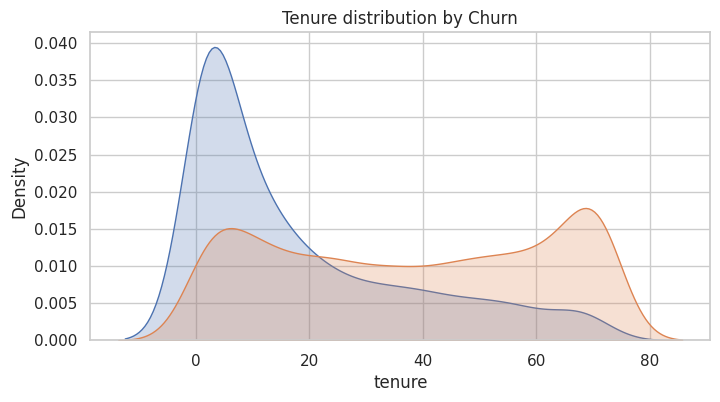

In [155]:
#Feature-Specific Visualizations

#Tenure vs Churn
plt.figure(figsize=(8,4))
sns.kdeplot(train_df[train_df['Churn']==1]['tenure'], label='Churn', shade=True)
sns.kdeplot(train_df[train_df['Churn']==0]['tenure'], label='No Churn', shade=True)
plt.title('Tenure distribution by Churn')
plt.show()

/tmp/ipython-input-84581705.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_df[train_df['Churn']==1]['MonthlyCharges'], label='Churn', shade=True)
/tmp/ipython-input-84581705.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_df[train_df['Churn']==0]['MonthlyCharges'], label='No Churn', shade=True)


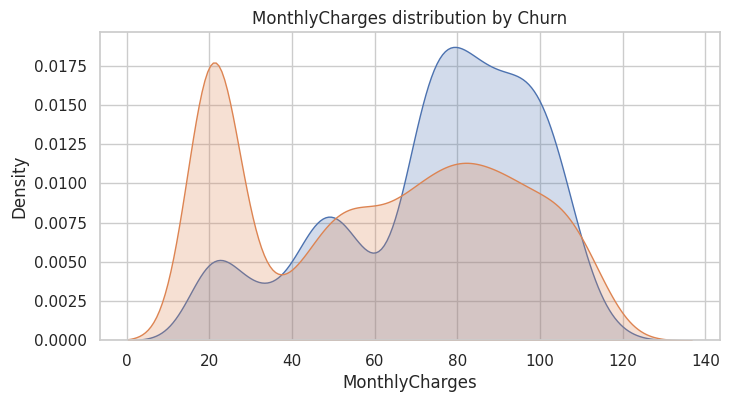

In [156]:
#MonthlyCharges vs Churn
plt.figure(figsize=(8,4))
sns.kdeplot(train_df[train_df['Churn']==1]['MonthlyCharges'], label='Churn', shade=True)
sns.kdeplot(train_df[train_df['Churn']==0]['MonthlyCharges'], label='No Churn', shade=True)
plt.title('MonthlyCharges distribution by Churn')
plt.show()


 2. Data Preprocessing:
 ● Handle missing values in the dataset. Consider different strategies.
 ● Dealwith categorical variables through encoding techniques.
 ● Normalize/scale the numerical features where necessary.
 ● Handle outliers, if applicable, using appropriate methods

In [157]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer


In [158]:
print(train_df.isnull().sum())


customerID            0
gender              169
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity      169
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges      394
TotalCharges          0
Churn                 0
dtype: int64


In [159]:
#
train_df['TotalCharges'] = pd.to_numeric(train_df['TotalCharges'], errors='coerce')
test_df['TotalCharges'] = pd.to_numeric(test_df['TotalCharges'], errors='coerce')

# Fill missing values using median (robust to outliers)
train_df['TotalCharges'].fillna(train_df['TotalCharges'].median(), inplace=True)
test_df['TotalCharges'].fillna(test_df['TotalCharges'].median(), inplace=True)


/tmp/ipython-input-3709051793.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['TotalCharges'].fillna(train_df['TotalCharges'].median(), inplace=True)
/tmp/ipython-input-3709051793.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].meth

In [160]:
cat_cols = train_df.select_dtypes(include='object').columns.tolist()
num_cols = train_df.select_dtypes(include=['int64','float64']).columns.tolist()

# Impute categorical columns with mode
for col in cat_cols:
    train_df[col].fillna(train_df[col].mode()[0], inplace=True)
    test_df[col].fillna(test_df[col].mode()[0], inplace=True)


/tmp/ipython-input-1337189374.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[col].fillna(train_df[col].mode()[0], inplace=True)
/tmp/ipython-input-1337189374.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

In [161]:
#Encode Categorical Variables

#Binary categorical variables → Label Encoding:
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

le = LabelEncoder()
for col in binary_cols:
    train_df[col] = le.fit_transform(train_df[col])
    if col != 'Churn':  # apply same encoding to test data
        test_df[col] = le.transform(test_df[col])

In [162]:
#Multi-class categorical variables → One-Hot Encoding:
multi_cat_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                  'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                  'Contract', 'PaymentMethod']

train_df = pd.get_dummies(train_df, columns=multi_cat_cols)
test_df = pd.get_dummies(test_df, columns=multi_cat_cols)

# Align train and test data to ensure same columns
train_df, test_df = train_df.align(test_df, join='left', axis=1, fill_value=0)


In [163]:
#Normalize / Scale Numerical Features
scaler = StandardScaler()
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

train_df[num_features] = scaler.fit_transform(train_df[num_features])
test_df[num_features] = scaler.transform(test_df[num_features])

In [164]:
#Handle Outliers
for col in num_features:
    Q1 = train_df[col].quantile(0.25)
    Q3 = train_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    # Cap outliers
    train_df[col] = np.where(train_df[col] > upper, upper,
                             np.where(train_df[col] < lower, lower, train_df[col]))

    test_df[col] = np.where(test_df[col] > upper, upper,
                            np.where(test_df[col] < lower, lower, test_df[col]))
    print(f"{col} outliers capped.")
    print(f"Lower bound: {lower}, Upper bound: {upper}")
    print("\n")


tenure outliers capped.
Lower bound: -3.8234935624473714, Upper bound: 3.8148109830163164


MonthlyCharges outliers capped.
Lower bound: -3.5994737030821273, Upper bound: 3.487869572928096


TotalCharges outliers capped.
Lower bound: -2.937100038537297, Upper bound: 2.738597305771893




In [165]:
#Separate Features and Target
X_train = train_df.drop(['customerID', 'Churn'], axis=1)
y_train = train_df['Churn']

X_test = test_df.drop(['customerID', 'Churn'], axis=1)
y_test = test_df['Churn']
print("Data preprocessing completed.")
print(X_train.head())


Data preprocessing completed.
   gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0       0              0        0           0  0.097232             1   
1       0              0        0           0 -0.187173             0   
2       1              0        0           0  0.950447             1   
3       1              0        1           0  0.259749             1   
4       0              0        1           1  0.422266             0   

   PaperlessBilling  MonthlyCharges  TotalCharges  MultipleLines_No  ...  \
0                 0       -1.475766     -0.693923              True  ...   
1                 1       -0.976658     -0.576171             False  ...   
2                 0        1.114608      1.508417             False  ...   
3                 1       -1.485748     -0.653514              True  ...   
4                 1       -0.460912     -0.039101             False  ...   

   StreamingMovies_No  StreamingMovies_No internet service  \
0           

Feature Engineering:
 ● Engineer new features that could improve the model’s performance. For instance:

 ○ Canyoucreate interaction features (e.g., combining Tenure and Contract)?

 ○ Can you create a feature that captures customer lifetime value (e.g., Tenure *
 MonthlyCharges)?

 ● Perform feature selection to identify the most important features.


In [166]:
#Tenure × Contract
# Create a numerical representation of Contract from one-hot encoded columns
# Month-to-month=0, One year=1, Two year=2
train_df['Contract_num'] = train_df['Contract_One year'] * 1 + train_df['Contract_Two year'] * 2
test_df['Contract_num'] = test_df['Contract_One year'] * 1 + test_df['Contract_Two year'] * 2

# Interaction feature
# Ensure 'tenure' is used with the correct lowercase spelling
train_df['Tenure_Contract'] = train_df['tenure'] * train_df['Contract_num']
test_df['Tenure_Contract'] = test_df['tenure'] * test_df['Contract_num']
print("Feature engineering completed.")
print(train_df.head())

Feature engineering completed.
   customerID  gender  SeniorCitizen  Partner  Dependents    tenure  \
0  9509-MPYOD       0              0        0           0  0.097232   
1  7746-AWNQW       0              0        0           0 -0.187173   
2  2208-UGTGR       1              0        0           0  0.950447   
3  4884-LEVMQ       1              0        1           0  0.259749   
4  6682-VCIXC       0              0        1           1  0.422266   

   PhoneService  PaperlessBilling  MonthlyCharges  TotalCharges  ...  \
0             1                 0       -1.475766     -0.693923  ...   
1             0                 1       -0.976658     -0.576171  ...   
2             1                 0        1.114608      1.508417  ...   
3             1                 1       -1.485748     -0.653514  ...   
4             0                 1       -0.460912     -0.039101  ...   

   StreamingMovies_Yes  Contract_Month-to-month  Contract_One year  \
0                False                 

In [167]:
#Multiple services combined
service_cols = ['PhoneService','InternetService_DSL','InternetService_Fiber optic','InternetService_No',
                'OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No']

# Count number of services a customer has
train_df['NumServices'] = len(service_cols) - train_df[service_cols].sum(axis=1)
test_df['NumServices'] = len(service_cols) - test_df[service_cols].sum(axis=1)

# Explicitly convert 'NumServices' to integer type
train_df['NumServices'] = train_df['NumServices'].astype(int)
test_df['NumServices'] = test_df['NumServices'].astype(int)

print("Feature engineering completed.")
print(train_df.head())

Feature engineering completed.
   customerID  gender  SeniorCitizen  Partner  Dependents    tenure  \
0  9509-MPYOD       0              0        0           0  0.097232   
1  7746-AWNQW       0              0        0           0 -0.187173   
2  2208-UGTGR       1              0        0           0  0.950447   
3  4884-LEVMQ       1              0        1           0  0.259749   
4  6682-VCIXC       0              0        1           1  0.422266   

   PhoneService  PaperlessBilling  MonthlyCharges  TotalCharges  ...  \
0             1                 0       -1.475766     -0.693923  ...   
1             0                 1       -0.976658     -0.576171  ...   
2             1                 0        1.114608      1.508417  ...   
3             1                 1       -1.485748     -0.653514  ...   
4             0                 1       -0.460912     -0.039101  ...   

   Contract_Month-to-month  Contract_One year  Contract_Two year  \
0                    False               

In [168]:
#Customer Lifetime Value (CLV) Feature
#Tenure × MonthlyCharges
train_df['CustomerLifetimeValue'] = train_df['tenure'] * train_df['MonthlyCharges']
test_df['CustomerLifetimeValue'] = test_df['tenure'] * test_df['MonthlyCharges']
print("Feature engineering completed.")
print(train_df.head())

Feature engineering completed.
   customerID  gender  SeniorCitizen  Partner  Dependents    tenure  \
0  9509-MPYOD       0              0        0           0  0.097232   
1  7746-AWNQW       0              0        0           0 -0.187173   
2  2208-UGTGR       1              0        0           0  0.950447   
3  4884-LEVMQ       1              0        1           0  0.259749   
4  6682-VCIXC       0              0        1           1  0.422266   

   PhoneService  PaperlessBilling  MonthlyCharges  TotalCharges  ...  \
0             1                 0       -1.475766     -0.693923  ...   
1             0                 1       -0.976658     -0.576171  ...   
2             1                 0        1.114608      1.508417  ...   
3             1                 1       -1.485748     -0.653514  ...   
4             0                 1       -0.460912     -0.039101  ...   

   Contract_One year  Contract_Two year  \
0               True              False   
1              False   

Churn                                      1.000000
Contract_Month-to-month                    0.415331
OnlineSecurity_No                          0.341789
TechSupport_No                             0.339748
InternetService_Fiber optic                0.309783
PaymentMethod_Electronic check             0.298993
OnlineBackup_No                            0.269868
DeviceProtection_No                        0.256677
MonthlyCharges                             0.195950
PaperlessBilling                           0.189366
SeniorCitizen                              0.147568
StreamingMovies_No                         0.138777
StreamingTV_No                             0.136025
StreamingTV_Yes                            0.060250
StreamingMovies_Yes                        0.057556
MultipleLines_Yes                          0.040337
PhoneService                               0.014327
gender                                    -0.010942
MultipleLines_No phone service            -0.014327
MultipleLine

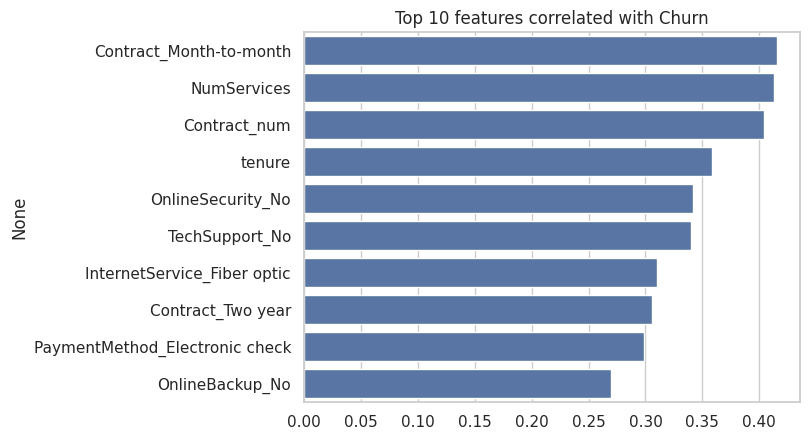

In [169]:
#Feature Selection
import seaborn as sns
import matplotlib.pyplot as plt

# Drop the 'customerID' column as it's not needed for correlation analysis
train_df_corr = train_df.drop('customerID', axis=1)

corr = train_df_corr.corr()['Churn'].sort_values(ascending=False)
print(corr)

# Plot top correlated features
top_corr = corr.drop('Churn').abs().sort_values(ascending=False).head(10)
sns.barplot(x=top_corr.values, y=top_corr.index)
plt.title("Top 10 features correlated with Churn")
plt.show()

CustomerLifetimeValue          0.125812
TotalCharges                   0.122227
MonthlyCharges                 0.110290
tenure                         0.109967
NumServices                    0.046216
Contract_num                   0.042927
Contract_Month-to-month        0.038019
Tenure_Contract                0.026066
InternetService_Fiber optic    0.024576
gender                         0.022637
dtype: float64


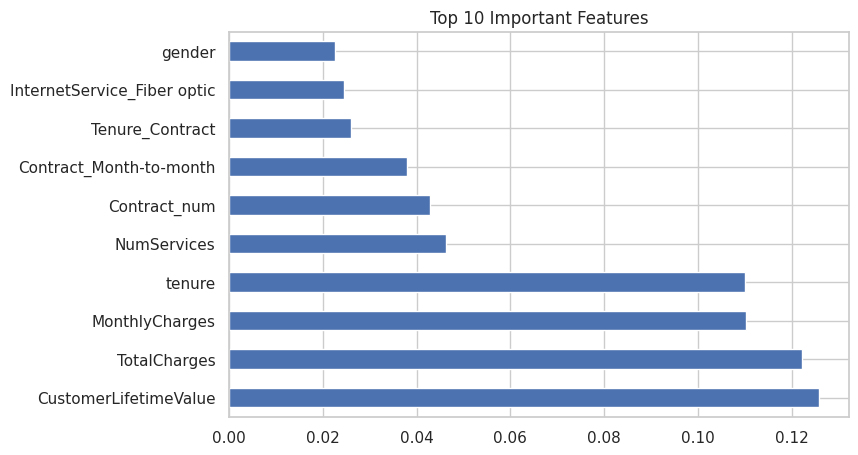

In [170]:
#Using Tree-Based Feature Importance
from sklearn.ensemble import RandomForestClassifier

# Prepare data
X_train = train_df.drop(['customerID','Churn'], axis=1)
y_train = train_df['Churn']

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Feature importance
importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print(importances.head(10))

# Plot
importances.head(10).plot(kind='barh', figsize=(8,5))
plt.title("Top 10 Important Features")
plt.show()

In [171]:
#Optional Dimensionality Reduction
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.impute import SimpleImputer

# Impute any remaining missing values in X_train
imputer = SimpleImputer(strategy='mean') # or 'median', 'most_frequent'
X_train_imputed = imputer.fit_transform(X_train)

selector = SelectKBest(score_func=f_classif, k=15)
selector.fit(X_train_imputed, y_train)
selected_features = X_train.columns[selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['tenure', 'InternetService_Fiber optic', 'OnlineSecurity_No',
       'OnlineBackup_No', 'DeviceProtection_No', 'TechSupport_No',
       'TechSupport_No internet service', 'StreamingTV_No internet service',
       'StreamingMovies_No internet service', 'Contract_Month-to-month',
       'Contract_Two year', 'PaymentMethod_Electronic check', 'Contract_num',
       'Tenure_Contract', 'NumServices'],
      dtype='object')


 4. Model Development:

 ● Fit at least three different machine learning models.

 ● Evaluate the models using appropriate metrics.

 ● Compare the results of the models and identify the best-performing one based on the
 evaluation metrics.

In [172]:
#Import Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report


In [173]:
#Prepare Data
# Features and target
X = train_df.drop(['customerID','Churn'], axis=1)
y = train_df['Churn']

X_test = test_df.drop(['customerID','Churn'], axis=1)
y_test = test_df['Churn']
#Optional: Split training set for validation
X_train_split, X_val, y_train_split, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# **Train Models**

In [174]:
#Model 1: Logistic Regression
from sklearn.impute import SimpleImputer

# Impute any remaining missing values in X_train_split and X_val
imputer = SimpleImputer(strategy='mean') # or 'median', 'most_frequent'
X_train_split_imputed = imputer.fit_transform(X_train_split)
X_val_imputed = imputer.transform(X_val)


lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_split_imputed, y_train_split)
y_pred_lr = lr.predict(X_val_imputed)

In [175]:
#Model 2: Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_split, y_train_split)
y_pred_rf = rf.predict(X_val)


In [176]:
#Model 3: XGBoost
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train_split, y_train_split)
y_pred_xgb = xgb.predict(X_val)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:44:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [177]:
# Evaluate Models:
def evaluate_model(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc = roc_auc_score(y_true, y_pred)
    print(f"Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1: {f1:.4f}, ROC-AUC: {roc:.4f}")
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))


In [178]:
print("Logistic Regression Performance:")
evaluate_model(y_val, y_pred_lr)

print("Random Forest Performance:")
evaluate_model(y_val, y_pred_rf)

print("XGBoost Performance:")
evaluate_model(y_val, y_pred_xgb)


Logistic Regression Performance:
Accuracy: 0.8066, Precision: 0.6554, Recall: 0.5814, F1: 0.6162, ROC-AUC: 0.7350
Confusion Matrix:
 [[734  92]
 [126 175]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       826
           1       0.66      0.58      0.62       301

    accuracy                           0.81      1127
   macro avg       0.75      0.74      0.74      1127
weighted avg       0.80      0.81      0.80      1127

Random Forest Performance:
Accuracy: 0.7950, Precision: 0.6423, Recall: 0.5249, F1: 0.5777, ROC-AUC: 0.7092
Confusion Matrix:
 [[738  88]
 [143 158]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86       826
           1       0.64      0.52      0.58       301

    accuracy                           0.80      1127
   macro avg       0.74      0.71      0.72      1127
weighted avg       0.79      0.80      0.79    

In [179]:
#Test Best Model on Test Set

# Convert y_test to numerical (0 and 1) to match the predictions
y_test_numerical = y_test.map({'Yes': 1, 'No': 0})

y_test_pred = xgb.predict(X_test)
evaluate_model(y_test_numerical, y_test_pred)

Accuracy: 0.7921, Precision: 0.6125, Recall: 0.5370, F1: 0.5723, ROC-AUC: 0.7091
Confusion Matrix:
 [[920 124]
 [169 196]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86      1044
           1       0.61      0.54      0.57       365

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.78      0.79      0.79      1409



 5. Model Fine-Tuning:
 ● Use techniques such as GridSearchCV or RandomizedSearchCV to fine-tune
 hyperparameters for your chosen models.

 ● Evaluate whether hyperparameter tuning improves performance.

 ● Justify your choice of hyperparameters.

In [180]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score


# Random Forest

In [181]:
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}


# B. XGBoost

In [182]:
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}


In [183]:
#Random Forest
rf = RandomForestClassifier(random_state=42)

rf_random = RandomizedSearchCV(estimator=rf, param_distributions=rf_param_grid,
 n_iter=20, cv=5, scoring='roc_auc', verbose=2, random_state=42, n_jobs=-1)

rf_random.fit(X_train_split, y_train_split)
print("Best RF parameters:", rf_random.best_params_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
40 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/

Best RF parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10}


In [184]:
#XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

xgb_random = RandomizedSearchCV(estimator=xgb_model,
                                param_distributions=xgb_param_grid,
                                n_iter=20, cv=5, scoring='roc_auc',
                                verbose=2, random_state=42, n_jobs=-1)

xgb_random.fit(X_train_split, y_train_split)
print("Best XGB parameters:", xgb_random.best_params_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:46:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best XGB parameters: {'subsample': 0.7, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 0.7}


In [185]:
#Evaluate Tuned Models
from sklearn.metrics import classification_report, roc_auc_score

# Random Forest
y_val_pred_rf = rf_random.predict(X_val)
print("Random Forest Tuned ROC-AUC:", roc_auc_score(y_val, y_val_pred_rf))
print(classification_report(y_val, y_val_pred_rf))

# XGBoost
y_val_pred_xgb = xgb_random.predict(X_val)
print("XGBoost Tuned ROC-AUC:", roc_auc_score(y_val, y_val_pred_xgb))
print(classification_report(y_val, y_val_pred_xgb))


Random Forest Tuned ROC-AUC: 0.733515400641928
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       826
           1       0.68      0.56      0.62       301

    accuracy                           0.81      1127
   macro avg       0.77      0.73      0.75      1127
weighted avg       0.81      0.81      0.81      1127

XGBoost Tuned ROC-AUC: 0.7202404414662988
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       826
           1       0.70      0.52      0.60       301

    accuracy                           0.81      1127
   macro avg       0.77      0.72      0.74      1127
weighted avg       0.80      0.81      0.80      1127



| Hyperparameter                             | Reasoning                                                          |
| ------------------------------------------ | ------------------------------------------------------------------ |
| `n_estimators`                             | More trees generally improve performance but increase computation. |
| `max_depth`                                | Controls tree complexity; prevents overfitting if too deep.        |
| `min_samples_split` / `min_samples_leaf`   | Prevent overfitting by limiting splits and leaf size.              |
| `max_features`                             | Controls feature randomness; balances bias and variance.           |
| `learning_rate` (XGBoost)                  | Smaller values reduce overfitting; need more trees.                |
| `subsample` / `colsample_bytree` (XGBoost) | Introduces randomness to prevent overfitting.                      |
